Here we will parse input genomes and annotations for pre-training the model.

In [12]:
import os

# Project directory
proj_dir = '~/projects/splicing/'

# Where to save plots
plt_dir = proj_dir + 'plots/genomes'
os.makedirs(plt_dir, exist_ok=True)

# Where to find downloaded genome data
dat_dir = '/home/elek/sds/sd17d003/Anamaria/genomes/'

### 0. Gencode

Genomes for human and mouse with high-quality manual annotation (includes splice variants):

In [14]:
gencode_genomes = []
for root, dirs, files in os.walk(dat_dir+'gencode/fasta/'):
    for file in files:
        if file.endswith('.fa.gz'):
            gencode_genomes.append(os.path.splitext(os.path.splitext(file)[0])[0])

gencode_genomes.sort()
print("Gencode genomes:", len(gencode_genomes))
gencode_genomes

Gencode genomes: 2


['Homo_sapiens', 'Mus_musculus']

### 1. Mazin et al. genome annotations

Mazin et al. generated genome annotations for human, mouse, macaque, rat, rabbit and opposum, that we want to re-use.

In [15]:
mazin_genomes = []
for root, dirs, files in os.walk(dat_dir+'mazin/fasta'):
    for file in files:
        if file.endswith('.fasta.bgz'):
            mazin_genomes.append(os.path.splitext(os.path.splitext(file)[0])[0])

mazin_genomes.sort()
print("Mazin genomes:", len(mazin_genomes))
mazin_genomes

Mazin genomes: 6


['Homo_sapiens',
 'Macaca_mulatta',
 'Monodelphis_domestica',
 'Mus_musculus',
 'Oryctolagus_cuniculus',
 'Rattus_norvegicus']

### 2. Ensembl
Genomes and automated annotations for mammals (taxonomy 40674):

In [16]:
# ensembl genomes
ensembl_genomes = []
for root, dirs, files in os.walk(dat_dir+'ensembl/fasta'):
    for file in files:
        if file.endswith('.fasta.bgz'):
            # file name without extension
            ensembl_genomes.append(os.path.splitext(os.path.splitext(file)[0])[0]) 

ensembl_genomes.sort()
print("Ensembl genomes:", len(ensembl_genomes))
ensembl_genomes[0:10]

Ensembl genomes: 128


['Ailuropoda_melanoleuca',
 'Aotus_nancymaae',
 'Balaenoptera_musculus',
 'Bison_bison_bison',
 'Bos_grunniens',
 'Bos_indicus_hybrid',
 'Bos_mutus',
 'Bos_taurus',
 'Bos_taurus_hybrid',
 'Callithrix_jacchus']

### 3. Zoonomia

In [18]:
# Zoonomia genomes
zoo_genomes = []
for root, dirs, files in os.walk(dat_dir+'/zoonomia/genome/'):
    for file in files:
        if file.endswith('.fa'):
            # file name without extension
            sps = os.path.splitext(os.path.splitext(file)[0])[0]
            if sps not in zoo_genomes:
                zoo_genomes.append(sps) 

zoo_genomes.sort()
print("Zoonomia genomes:", len(zoo_genomes))
zoo_genomes[0:10]

Zoonomia genomes: 243


['Acinonyx_jubatus',
 'Acomys_cahirinus',
 'Ailuropoda_melanoleuca',
 'Ailurus_fulgens',
 'Allactaga_bullata',
 'Alouatta_palliata',
 'Ammotragus_lervia',
 'Anoura_caudifer',
 'Antilocapra_americana',
 'Aotus_nancymaae']

### 4. TOGA
Annotations for >600 mammalian genomes from various sources.

In [19]:
import pandas as pd
meta=pd.read_csv(dat_dir+'toga/overview.table.tsv', index_col=0, sep='\t', names=['species', 'common_name', 'taxid', 'lineage', 'assembly_name', 'accession_or_url', 'contig_n50', 'scaffold_n50'])

# Add column with the source of assembly
meta['source'] = meta['accession_or_url']
meta.loc[meta['accession_or_url'].str.contains('http|ftp'), 'source'] = 'link'
meta.loc[meta['accession_or_url'].str.contains('DNA Zoo'), 'source'] = 'DNA Zoo'
meta.loc[meta['accession_or_url'].str.startswith('GCF'), 'source'] = 'RefSeq'
meta.loc[meta['accession_or_url'].str.startswith('GCA'), 'source'] = 'GenBank'

# Count the number of genomes per source
source_counts = meta['source'].value_counts()
print(source_counts)

source
GenBank                  431
DNA Zoo                  109
RefSeq                    97
T2T primates               6
link                       3
TBG                        2
CNGB Sequence Archive      1
GIGADB                     1
Name: count, dtype: int64


I download GenBank and RefSeq genomes from NCBI, and Zoonomia genomes from TOGA-provided repository (`download_toga_assemblies.sh`).   
The remaining genomes I download manually.

In [20]:
meta.loc[meta['source'].isin(['CNGB Sequence Archive', 'GIGADB', 'TBG', 'link', 'T2T primates'])]

,common_name,taxid,lineage,assembly_name,accession_or_url,contig_n50,scaffold_n50,source
species,,,,,,,,
Acomys cahirinus,Egyptian spiny mouse,10068,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLacoCah2,https://zenodo.org/record/7761277#.ZEKxiRVBwsw,57643754,127770522,link
Balaena mysticetus,bowhead whale,27602,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLbalMys1,http://alfred.liv.ac.uk/downloads/bowhead_whal...,33808,876686,link
Balaenoptera musculus,Blue whale,9771,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLbalMus3,CNGB Sequence Archive,94743,8279331,CNGB Sequence Archive
Eliomys quercinus,garden dormouse,53277,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLeliQue1A,TBG,51740598,108114398,TBG
Eliomys quercinus,garden dormouse,53277,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLeliQue1B,TBG,45399149,107541173,TBG
Gorilla gorilla,western gorilla,9593,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLgorGor7,T2T primates,150804130,150804130,T2T primates
Leptonycteris yerbabuenae,Lesser long-nosed bat,700936,Mammalia; Theria; Eutheria; Boreoeutheria; Lau...,HLlepYer1,GIGADB,37711,14735151,GIGADB
Loxodonta africana,African savanna elephant,9785,Mammalia; Theria; Eutheria; Afrotheria; Probos...,HLloxAfr4,ftp://ftp.broadinstitute.org/pub/assemblies/ma...,65481,94531929,link
Pan paniscus,pygmy chimpanzee,9597,Mammalia; Theria; Eutheria; Boreoeutheria; Eua...,HLpanPan4,T2T primates,147028407,147028407,T2T primates


Count downloaded TOGA-annotated genomes per species.

In [21]:
# TOGA genomes
toga_genomes = []
for root, dirs, files in os.walk(dat_dir+'/toga/fasta'):
    for file in files:
        if file.endswith('.fasta.bgz'):
            # file name without extension
            sps_asn = os.path.splitext(os.path.splitext(file)[0])[0]
            sps, asn = sps_asn.split('__')
            if sps not in toga_genomes:
                toga_genomes.append(sps) 

toga_genomes.sort()
print("TOGA genomes:", len(toga_genomes))
toga_genomes[0:10]

TOGA genomes: 537


['Acinonyx_jubatus',
 'Acomys_cahirinus',
 'Acomys_dimidiatus',
 'Acomys_russatus',
 'Aepyceros_melampus',
 'Ailuropoda_melanoleuca',
 'Ailurus_fulgens',
 'Alces_alces',
 'Allactaga_bullata',
 'Allenopithecus_nigroviridis']

### All genomes

Unique set of genomes

In [22]:
# Unique set of genomes from ensembl and zoonomia
all_genomes = set(mazin_genomes + ensembl_genomes + zoo_genomes + toga_genomes)
all_genomes = sorted(all_genomes)
print(f'Total unique genomes: {len(all_genomes)}')

Total unique genomes: 591


Next, compare how many genomes are overlapping between Ensembl, Zoonomia and TOGA.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

venn3([set(ensembl_genomes), set(zoo_genomes), set(toga_genomes)],
      ('Ensembl', 'Zoonomia', 'TOGA'))
plt.title(f'Genomes for {len(all_genomes)} mammals')
plt.savefig(plt_dir + '/genome_overlap.png')
plt.show()

Which zoonomia genomes do not have TOGA annotations?

In [11]:
zoo_wo_toga = []
for genome in zoo_genomes:
    if genome not in toga_genomes:
        zoo_wo_toga.append(genome)
print(f"{len(zoo_wo_toga)} Zoonomia genomes don't have matched TOGA annotations")
print(zoo_wo_toga)

28 Zoonomia genomes don't have matched TOGA annotations
['Balaenoptera_acutorostrata', 'Bison_bison', 'Callicebus_donacophilus', 'Canis_lupus', 'Capromys_pilorides', 'Cebus_capucinus', 'Ceratotherium_simum', 'Chaetophractus_vellerosus', 'Colobus_angolensis', 'Crocidura_indochinensis', 'Cuniculus_paca', 'Desmodus_rotundus', 'Dicerorhinus_sumatrensis', 'Enhydra_lutris', 'Gorilla_gorilla', 'Homo_sapiens', 'Loxodonta_africana', 'Marmota_marmota', 'Megaderma_lyra', 'Murina_feae', 'Neophocaena_asiaeorientalis', 'Orycteropus_afer', 'Panthera_tigris', 'Perognathus_longimembris', 'Peromyscus_maniculatus', 'Tonatia_saurophila', 'birdAnc333', 'fullTreeAnc105']


Some of those are just due to different file names, e.g.  
`Bison bison` in Zoonomia and  
`Bison bison bison` in TOGA,  
or  
`Canis lupus` in Zoonomia and  
`Canis lupus familiaris` in TOGA.  

I am not going to bother with this because I will use fasta files downloaded for TOGA annotations anyway.

TOGA annotation often use different chromosome names than downloaded genome fasta files. Write a function to check how many of TOGA chr names (gtf) we can map to genomes (fasta)?

In [12]:
# function to check chr names in gtf and fasta files
def check_chr_names(gtf_file, fasta_file):
    import gzip
    import pandas as pd

    # print(f"Checking chromosome names in {gtf_file} and {fasta_file}")
    # Read GTF file
    with gzip.open(gtf_file, 'rt') as f:
        gtf_data = pd.read_csv(f, sep='\t', comment='#', header=None)
    
    # Extract chromosome names from GTF
    gtf_chromosomes = set(gtf_data[0].unique())

    # Read FASTA file
    with open(fasta_file+'.fai', 'rt') as f:
        fasta_data = pd.read_csv(f, sep='\t', comment='#', header=None)

    # Extract chromosome names from FASTA
    fasta_chromosomes = set(fasta_data[0].unique())
    
    # Check if all gtf chromosomes are in fasta_chromosomes
    missing_chromosomes = gtf_chromosomes - fasta_chromosomes

    if missing_chromosomes:
        print(f"{fasta_file} missing chromosomes: {fasta_chromosomes}")
        print(f"{gtf_file} missing chromosomes: {missing_chromosomes}")
        return False
    else:
        return True

List pairs of gtf-fasta files after mapping chr names.

In [ ]:
fasta_files = []
gtf_files = []
for root, dirs, files in os.walk(dat_dir+'/toga/gtf_mapped'):
    for file in files:
        if file.endswith('.gtf.gz'):
            # genome file
            gtf_file=os.path.join(root, file)
            # file name without extension
            sps_asn = os.path.splitext(os.path.splitext(file)[0])[0]
            sps, asn = sps_asn.split('__')
            # check that fasta file exists
            fasta_file = os.path.join(dat_dir, 'toga/fasta', f'{sps_asn}.fasta.bgz')
            if not os.path.exists(fasta_file):
                continue
            gtf_files.append(gtf_file)
            fasta_files.append(fasta_file)

print(f'Mapped GTF files: {len(gtf_files)}')
print(f'Mapped FASTA files: {len(fasta_files)}')

Mapped GTF files: 388
Mapped FASTA files: 388


Compare chr names between gtf and fasta files, and only keep properly matched genomes.  
This may take ~10 minutes because I/O is slow even when paralelized.

In [ ]:
import time
from concurrent.futures import ThreadPoolExecutor

gtf_mapped_files = []
fasta_mapped_files = []
toga_annotated_genomes = []

start = time.time()
with ThreadPoolExecutor(max_workers=12) as executor:
    results = executor.map(check_chr_names, gtf_files, fasta_files)
    for gtf, fasta, result in zip(gtf_files, fasta_files, results):
        if result:
            # if chromosomes match, add to the list 
            gtf_mapped_files.append(gtf)
            fasta_mapped_files.append(fasta)

            # file name without extension
            fn = os.path.basename(gtf)
            sps_asn = os.path.splitext(os.path.splitext(fn)[0])[0]
            sps, asn = sps_asn.split('__')
            toga_annotated_genomes.append(sps) 


elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"Elapsed: {int(minutes)} min {seconds:.1f} sec")

print(f'Mapped correctly GTF files: {len(gtf_mapped_files)}')
print(f'Mapped correctly FASTA files: {len(fasta_mapped_files)}')

Inspect overlap of genome sources after mapping annotation chr names.

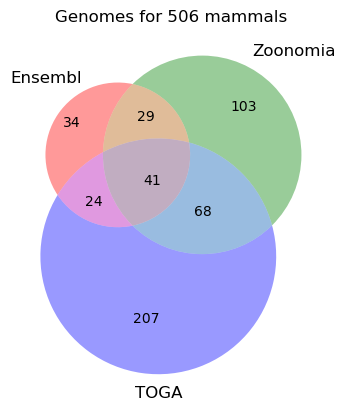

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

all_genomes = set(ensembl_genomes + zoo_genomes + toga_annotated_genomes)
venn3([set(ensembl_genomes), set(zoo_genomes), set(toga_annotated_genomes)],
      ('Ensembl', 'Zoonomia', 'TOGA'))
plt.title(f'Genomes for {len(all_genomes)} mammals')
plt.savefig(plt_dir + '/genome_annot_overlap.png')
plt.show()

I will use:  
1. Ensembel genomes with Mazin et al. annotations
2. all other Ensembl vertebrate genomes
3. additional genomes with TOGA annotations

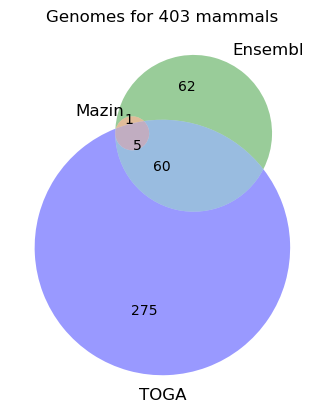

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

all_genomes = set(mazin_genomes + ensembl_genomes + toga_annotated_genomes)
venn3([set(mazin_genomes), set(ensembl_genomes), set(toga_annotated_genomes)],
      ('Mazin', 'Ensembl', 'TOGA'))
plt.title(f'Genomes for {len(all_genomes)} mammals')
plt.savefig(plt_dir + '/genome_use_overlap.png')
plt.show()

In [ ]:
# make a dictionary mapping between genome names and their respective fasta, fai, and gtf files
genome_dict = {}

all_genomes = set(mazin_genomes + ensembl_genomes + toga_annotated_genomes)
all_genomes = sorted(all_genomes)

for sp in all_genomes:
    if sp in mazin_genomes:
        source_sp = 'mazin'
        fasta_fn = f'{dat_dir}/mazin/fasta/{sp}.fasta.bgz'
        fai_fn = f'{dat_dir}/mazin/fasta/{sp}.fasta.bgz.fai'
        gtf_fn = f'{dat_dir}/mazin/gtf/{sp}.gtf.gz'
    elif sp in ensembl_genomes:
        source_sp = 'ensembl'
        fasta_fn = f'{dat_dir}/ensembl/fasta/{sp}.fasta.bgz'
        fai_fn = f'{dat_dir}/ensembl/fasta/{sp}.fasta.bgz.fai'
        gtf_fn = f'{dat_dir}/ensembl/gtf/{sp}.gtf.gz'
    elif sp in toga_annotated_genomes:
        source_sp = 'toga'
        sp_ = sp.replace('_', ' ')
        asn = meta.loc[sp_, 'assembly_name']
        if len(asn) > 1:
            for an in asn:
                if os.path.exists(f'{dat_dir}/toga/gtf_mapped/{sp}__{an}.gtf.gz'):
                    asn = an
                    break
        fasta_fn = f'{dat_dir}/toga/fasta/{sp}__{asn}.fasta.bgz'
        fai_fn = f'{dat_dir}/toga/fasta/{sp}__{asn}.fasta.bgz.fai'
        gtf_fn = f'{dat_dir}/toga/gtf_mapped/{sp}__{asn}.gtf.gz'
            
    else:
        print(f"{sp} not found in any database.")

    # Check if files exist
    for fn in [fasta_fn, fai_fn, gtf_fn]:
        if not os.path.exists(fn):
            print(f"Warning: {fn} does not exist.")
    
    # Add to the dictionary
    genome_dict[sp] = {
        'source': source_sp,
        'fasta': fasta_fn,
        'fai': fai_fn,
        'gtf': gtf_fn
    }

import json
with open("/work/aelek/projects/splicing/data/genomes.txt", "w") as fp:
    json.dump(genome_dict, fp) 

Count final sources of genomes + annotations

In [ ]:
sources = []
for genome in genome_dict.values():
    sources.append(genome['source'])
source_counts = pd.Series(sources).value_counts()
source_counts

toga       275
ensembl    122
mazin        6
Name: count, dtype: int64

Make a directory with links to selected genome files

In [ ]:
import os
import pathlib

genome_dir = pathlib.Path(proj_dir + "data/genomes")
genome_dir.mkdir(parents=True, exist_ok=True)

for species, paths in genome_dict.items():
    target_dir = genome_dir / species
    target_dir.mkdir(parents=True, exist_ok=True)

    for key in ["fasta", "fai", "gtf"]:
        src = pathlib.Path(paths[key])
        if key == "gtf":
            dst = target_dir / f"{species}.gtf.gz"
        else:
            dst = target_dir / f"{species}.{key}.gz"
        if not dst.exists():
            dst.symlink_to(src.resolve())

print(f"Genomes have been organized in {genome_dir}")

Genomes have been organized in /work/aelek/projects/splicing/data/genomes
